# Lineer Regresyon

Öncelikle Lineer Regresyonun tanımını kısaca yapacak olursak. İki veya daha fazla değişken arasındaki ilişkinin bir doğru ile gösterilmesine Lineer Regresyon denir. Jupyter Notebook üzerinden anlatımımıza devam edelim.

Kütüphanelerimizi tanımlayalım.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

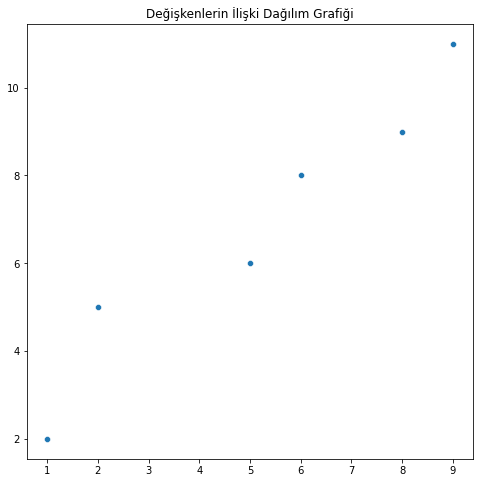

In [2]:
# Defining variables for regression
x_train =  np.array([1,2,5,6,8,9])
y_train = np.array([2,5,6,8,9,11])

# Show Relationship between variables with scatterplot
plt.figure(figsize = (8,8))
plt.title("Değişkenlerin İlişki Dağılım Grafiği")
sns.scatterplot(x_train,y_train);

Değişkenlerimizin değerleri koordinat düzleminde bu şekilde dağılmış gözüküyor.

Bu değişkenler için en iyi regresyon doğrusunu çizeceğiz ve bu regresyon doğrusu üzerinden tahminleme işlemini gerçekleştireceğiz.

Peki regresyon doğrusunun iyi olup olmadığını neye göre belirleyeceğiz? 
Öncelikle bizim amacımız bu noktalara göre en iyi doğruyu çekmek. Bu doğruyu çekerken bizim için önemli olan şey bu doğrunun **eğimidir**.

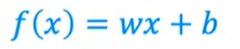

Yukarıdaki formül bilindiği üzere basit bir doğru formülüdür. Bu formüldeki eğim **w**'dur. Bundan dolayı bizim amacımız bu doğruları en iyi kesecek w eğimli doğruyu bulmaktır. Yani **w**'nun en iyi halini bulmaktır.

Bunun için 

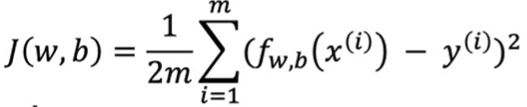


formülü ile verdiğimiz ve değerlerine karşılık gelen değerlere ulaşıyoruz.
Formüldeki m değeri veri sayımız. x(i) i'ninci x değeri, y(i) ise i'ninci y değeridir.

Bu formülü python üzerinde yazarak gerçekleştirelim ve J(w) değerlerini elde edelim. 

In [3]:
def cost_function(x, y, w, b, yazdir):
    """
    :param x => gelecek olan x_train
    :param y => gelecek olan y_train
    :param w => bizim belirlediğimiz doğrunun eğimi
    :param yazdir (bool) => yazdırma işleminin olup olmaması seçimi 
    
    """
    
    adet = len(x)
    total_j_w = 0
    if yazdir:
        print("m değeri:", adet)
        print("w değeri:", w)
    for i in range(adet):
        j_w = ((w*x[i] + b) - y[i])**2
        if yazdir:
            print("x değeri:",x[i]," y değeri:",y[i], "J(w) değeri:", j_w)
        total_j_w = total_j_w + j_w
    j_w_result = (total_j_w.round(2)/(2*adet)).round(2)
    if yazdir:
        print("Sonuç J(w) değeri:", j_w_result)
    return j_w_result

Metodumuzu yukarıda tanımladık şimdi kullanmak istediğimiz w değerlerini yollayalım ve sonuçları inceleyelim.

In [4]:
sonuclar = []
for w in np.arange(0,3,0.5):
    sonuclar.append(cost_function(x_train,y_train,w, 1, True))

m değeri: 6
w değeri: 0.0
x değeri: 1  y değeri: 2 J(w) değeri: 1.0
x değeri: 2  y değeri: 5 J(w) değeri: 16.0
x değeri: 5  y değeri: 6 J(w) değeri: 25.0
x değeri: 6  y değeri: 8 J(w) değeri: 49.0
x değeri: 8  y değeri: 9 J(w) değeri: 64.0
x değeri: 9  y değeri: 11 J(w) değeri: 100.0
Sonuç J(w) değeri: 21.25
m değeri: 6
w değeri: 0.5
x değeri: 1  y değeri: 2 J(w) değeri: 0.25
x değeri: 2  y değeri: 5 J(w) değeri: 9.0
x değeri: 5  y değeri: 6 J(w) değeri: 6.25
x değeri: 6  y değeri: 8 J(w) değeri: 16.0
x değeri: 8  y değeri: 9 J(w) değeri: 16.0
x değeri: 9  y değeri: 11 J(w) değeri: 30.25
Sonuç J(w) değeri: 6.48
m değeri: 6
w değeri: 1.0
x değeri: 1  y değeri: 2 J(w) değeri: 0.0
x değeri: 2  y değeri: 5 J(w) değeri: 4.0
x değeri: 5  y değeri: 6 J(w) değeri: 0.0
x değeri: 6  y değeri: 8 J(w) değeri: 1.0
x değeri: 8  y değeri: 9 J(w) değeri: 0.0
x değeri: 9  y değeri: 11 J(w) değeri: 1.0
Sonuç J(w) değeri: 0.5
m değeri: 6
w değeri: 1.5
x değeri: 1  y değeri: 2 J(w) değeri: 0.25
x değeri: 

Çıkan değerleri bir grafik üzerinden görüntüleyelim.

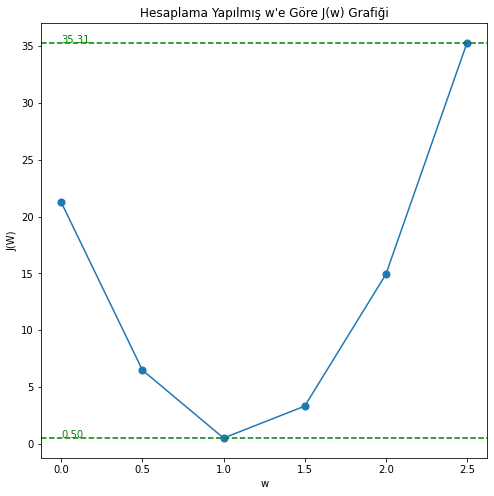

In [5]:
w_degerleri = np.arange(0,3,0.5)

plt.figure(figsize = (8,8))
plt.title("Hesaplama Yapılmış w'e Göre J(w) Grafiği")
plt.xlabel("w")
plt.ylabel("J(W)")
plt.scatter(w_degerleri, sonuclar, s = 50)
plt.axhline(np.array(sonuclar).min(), linestyle = '--', color = "g", )
plt.axhline(np.array(sonuclar).max(), linestyle = '--', color = "g", )
plt.text(0,np.array(sonuclar).max(), "{:.2f}".format(np.array(sonuclar).max()), c = "g")
plt.text(0,np.array(sonuclar).min(), "{:.2f}".format(np.array(sonuclar).min()), c = "g")
plt.plot(w_degerleri,sonuclar)
plt.show()

Bu formüle dayanarak bardağa benzeyen bir grafik çizdik ve min max J(w) değerlerine bir çizgi koyduk.

Peki bunlar ne anlama geliyor. Biz verdiğimiz w değerlerini bir de değişkenlerimiz üzerinde bir doğru olarak görelim bakalım nasıl görünüyor.

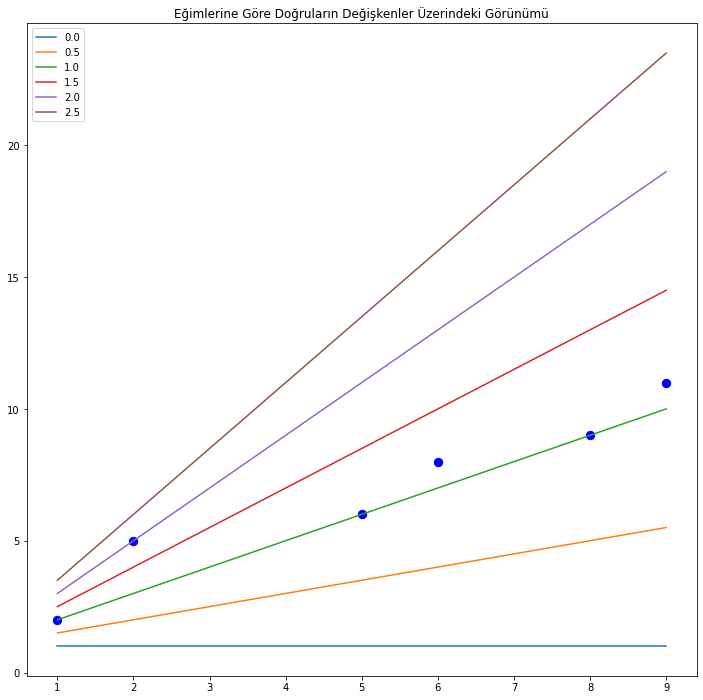

In [6]:
index = 0

b= 1
plt.figure(figsize = (12,12))
plt.title("Eğimlerine Göre Doğruların Değişkenler Üzerindeki Görünümü")
for w in w_degerleri:
    line_y = x_train*w + b
    plt.plot(x_train,line_y) 
    index +=1
plt.legend(w_degerleri, loc = 'best')
plt.scatter(x_train,y_train, c = 'b', s = 70)
plt.show()



Grafikte de görüldüğü üzere en düşün J(w) değerine sahip olan w eğimli doğrunun grafiği en iyi doğruyu göstermiş oluyor.

Yani Kısacası Loss Fonksiyonu sonucunda hesaplanan J(w) değeri en küçük olan w değeri en iyi doğruyu verir. Tabi ki bu noktada overfitting'e dikkat etmek gerekmektedir. Her zaman J(w) en küçük olan değer en iyi sonuçları göstermez. 

Peki biz en iyi w değerini bulmak için sürekli elle w değerlerini deneyerek mi bulacağız? Tabi ki hayır!

## Gradient Descent (Gradyan Azaltma)

Belirlediğimiz learning rate'ler eşliğinde w değerini optimize etmemizi sağlar.

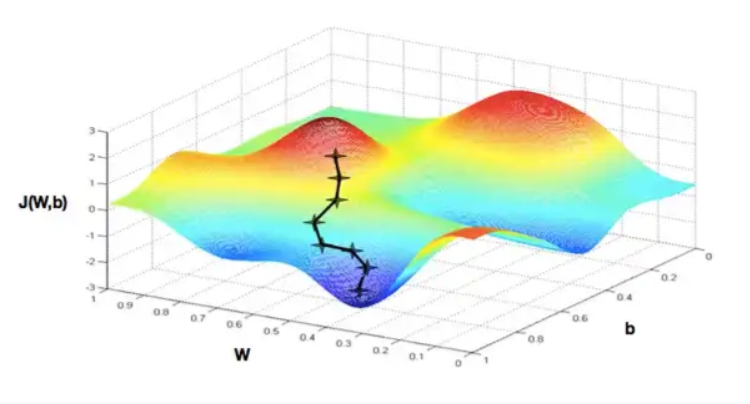

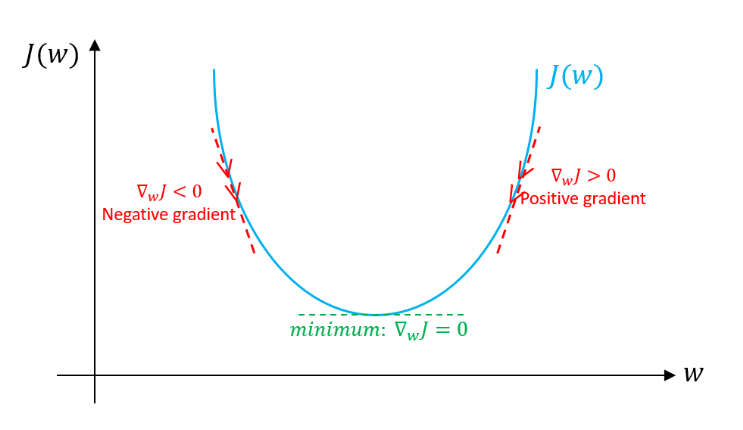

Bu tabloyu lineer regresyon tarafında çizdirmiştik. Genellikle J(w) değeri en düşük olan w değeri bize en iyi sonucu vermekteydi. 
Bunun için resimdeki kırmızı yerler azaltılarak minimize edilmeye çalışılmaktadır. Bu işlemi nasıl yapıyoruz?

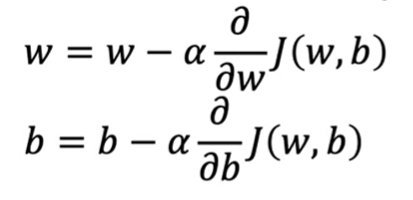

Bu formülün açılmış hali aşağıdaki gibidir.

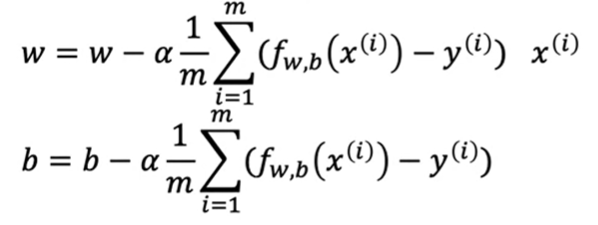

Gradyan azalma yöntemi bu formüllere dayanmaktadır. Bu formülde önemli olan hususlardan bazılarını söylemek isterim.

* w ve b hesaplamalarda **eşzamanlı** çalışır. Yani hesaplanan yeni w değeri b değeri hesaplamasında kullanılmaz da eski w değeri kullanılır.


* Learning rate değeri çok az olursa baby step dediğimiz küçük adımlar ile optimize edilir. Bu istemediğimiz bir durumdur çünkü gradyan azaltma işlemini gereksiz uzatır. Eğer learning rate değerini çok büyük yaparsak bu sefer de çok büyük adımlar attığı için optimize edilemeyecek hale gelmektedir. Bunun için uygun learning rate değerini seçmek önemlidir.

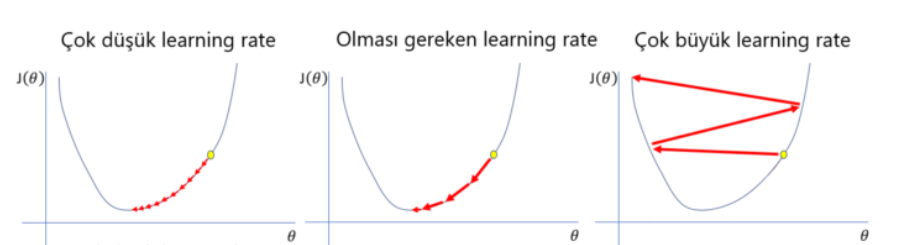

#### Python Uygulama

Öncelikle gradyan hesaplama fonksyonumuzu yukarıdaki formüle dayanarak yazalım.

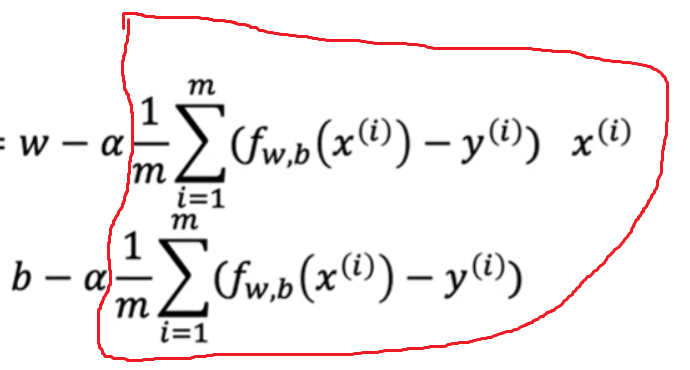

In [7]:
def compute_gradient(x, y, w, b):
    """
    :param x => gelecek olan x_train
    :param y => gelecek olan y_train
    :param w => Eğim değeri 
    :param b => sabit değer (intercept)
    """
    # Veri adetini atıyoruz.
    m = x.shape[0]
    
    toplam_w = 0
    toplam_b = 0
    
    for i in range(m):
        #Hesaplama işlemi
        f_w_b = x[i]*w + b
        tek_w = (f_w_b - y[i])*x[i]
        tek_b = (f_w_b - y[i])
        
        #Ekleme işlemi
        toplam_w = toplam_w + tek_w
        toplam_b = toplam_b + tek_b
    
    gradyan_hesaplanmis_w = toplam_w/m
    gradyan_hesaplanmis_b = toplam_b/m
    
    return gradyan_hesaplanmis_w, gradyan_hesaplanmis_b

Şimdi üsteki formülün hepsini yani gradyan azaltma fonksiyonunu yazalım.

In [8]:
def gradient_descent(x,y, w,b, alpha, num_iter, cost_function, compute_gradient):
    """
    Gradiet descent formülasyonunu uygulayarak sonuç değerini döndürür.
    
    :param x (array) => x_train
    :param y (array)=> y_train
    :param w => Eğim değeri 
    :param b => sabit değer (intercept)
    :param alpha => learning rate 
    :param num_iter => iterayon sayısı
    :param cost_function => cost hesaplama fonksiyonu
    :param compute_gradient => gradyan hesaplama fonksiyonu
    
    :return j_w_list => Yeni bulunan w ler iler hesaplanmış J(w) değerleri listesi
    :return w_list => yeni bulunan w değerleri
    """
    
    son_w = w
    son_b = b
    
    j_w_list = []
    w_list = []

    for i in range(num_iter):
        #Gradyan hesaplama işlemi
        gradyan_hesaplanmis_w, gradyan_hesaplanmis_b = compute_gradient(x,y,w,b)
        
        #Gradyan hesaplandıktan sonra bunu learning rate ile çarparak ilerleme miktarını belirleme
        adim_miktari_w = gradyan_hesaplanmis_w * alpha
        adim_miktari_b = gradyan_hesaplanmis_b * alpha  
        
        son_w = son_w - adim_miktari_w
        son_b = son_b - adim_miktari_b
        
        j_w_list.append(cost_function(x,y,son_w,son_b,False))
        w_list.append(son_w)
        
        print("İterasyon:",i+1," w değeri:", son_w, " b değeri:", son_b, " J(w) değeri:", cost_function(x,y,son_w,son_b, False))
        
        
    return j_w_list, w_list
    

Yukarıdaki metodumuzu çağıralım ve sonucumuzu gözlemleyelim

In [12]:
w = 1
b = 10

j_w_list, w_list = gradient_descent(x_train, y_train, w, b,0.00050, 50, cost_function, compute_gradient)

İterasyon: 1  w değeri: 0.9783333333333333  b değeri: 9.995833333333334  J(w) değeri: 34.04
İterasyon: 2  w değeri: 0.9566666666666666  b değeri: 9.991666666666667  J(w) değeri: 33.09
İterasyon: 3  w değeri: 0.9349999999999998  b değeri: 9.9875  J(w) değeri: 32.16
İterasyon: 4  w değeri: 0.9133333333333331  b değeri: 9.983333333333334  J(w) değeri: 31.24
İterasyon: 5  w değeri: 0.8916666666666664  b değeri: 9.979166666666668  J(w) değeri: 30.35
İterasyon: 6  w değeri: 0.8699999999999997  b değeri: 9.975000000000001  J(w) değeri: 29.47
İterasyon: 7  w değeri: 0.8483333333333329  b değeri: 9.970833333333335  J(w) değeri: 28.61
İterasyon: 8  w değeri: 0.8266666666666662  b değeri: 9.966666666666669  J(w) değeri: 27.77
İterasyon: 9  w değeri: 0.8049999999999995  b değeri: 9.962500000000002  J(w) değeri: 26.94
İterasyon: 10  w değeri: 0.7833333333333328  b değeri: 9.958333333333336  J(w) değeri: 26.14
İterasyon: 11  w değeri: 0.761666666666666  b değeri: 9.95416666666667  J(w) değeri: 25.35

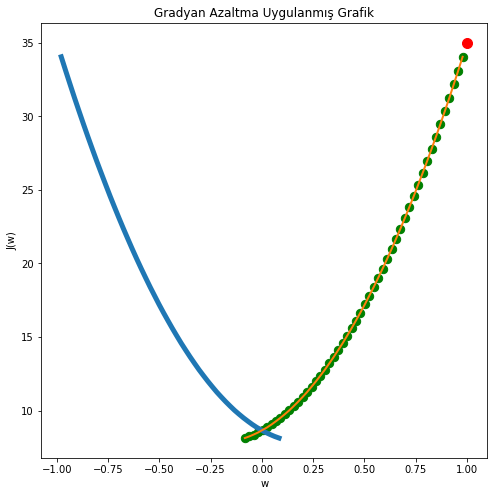

In [13]:
plt.figure(figsize  = (8,8))
plt.title("Gradyan Azaltma Uygulanmış Grafik")
plt.scatter(w, cost_function(x_train, y_train, w, b, False), c = 'r', s = 100)
plt.scatter(w_list, j_w_list, c = 'g', s = 70)
w_list_total = [_*-1 for _ in w_list]
plt.plot(w_list_total,j_w_list, linewidth = 5)
plt.plot(w_list, j_w_list, linewidth = 2)
plt.xlabel("w")
plt.ylabel("J(w)")
plt.show();

Gradyan Azaltma işleminin ardından görüldüğü üzere git gide J(w) değerimiz düşmüş yani optimizasyon işlemi gerçekleşmiştir.

### Referans

* https://medium.com/deep-learning-turkiye/gradient-descent-nedir-3ec6afcb9900

* https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#:~:text=Gradient%20descent%20is%20an%20optimization,the%20parameters%20of%20our%20model.

* https://medium.com/deep-learning-turkiye/her-%C5%9Feyiyle-lineer-regresyon-makine-%C3%B6%C4%9Frenmesi-serisi-1-1ee2aec10b74

* https://www.coursera.org/learn/machine-learning